## Visualize

"\nfor data in test_loader:\n    pred = predict(model, data)\n    print('pred:', VERBS[pred[0]], '\tgt:', VERBS[data.y[0]])\n    if pred != data.y:\n        show_pyg_graph(data)\n        break\n"

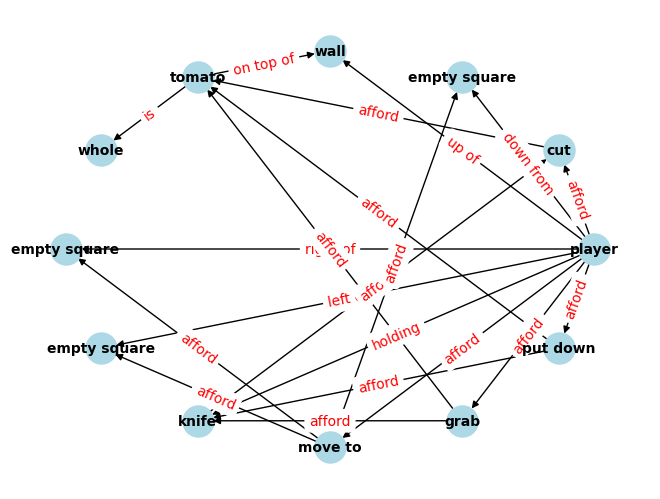

In [10]:
def show_pyg_graph(graph):

    # Create an empty NetworkX directed graph
    G = nx.DiGraph()
    
    # Add nodes with their features
    for i in range(graph.num_nodes):
        G.add_node(i, label=NODES[graph.node_type[i].item()])
    
    # Add edges with their attributes
    edge_index = graph.edge_index
    #edge_attr = graph.edge_attr if 'edge_attr' in graph else None
    edge_type = graph.edge_type if 'edge_attr' in graph else None
    for i in range(edge_index.size(1)):
        source, target = edge_index[:, i].tolist()
        if edge_type is not None:
            label = RELS[int(edge_type[i].item())]
            G.add_edge(source, target, label=label)
        else:
            G.add_edge(source, target)
    
    # Draw the graph
    pos = nx.circular_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

show_pyg_graph(dataset[8])

def predict(model, data):
    data = data.to(device)
    out = model(data)
    pred = out.max(dim=1)[1]
    return pred
'''
for data in test_loader:
    pred = predict(model, data)
    print('pred:', VERBS[pred[0]], '\tgt:', VERBS[data.y[0]])
    if pred != data.y:
        show_pyg_graph(data)
        break
'''